In [1]:
import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt   
import seaborn as sns   


In [2]:
data = pd.read_csv('customer_purchase_behavior complete.csv')
data.head()

Age_Group Gender Education_Level Browsing_History Purchase_Frequency  \
0         Teen  Other              HS         Clothing               High   
1  Middle-aged      M              HS      Electronics               High   
2         Teen      M             PhD            Books                Low   
3  Middle-aged  Other      Bachelor's      Electronics               High   
4         Teen      F      Bachelor's      Electronics               High   

  Preferred_Payment Next_Purchase_Category  
0       Credit Card            Electronics  
1    Online Payment               Clothing  
2    Online Payment            Electronics  
3       Credit Card                  Books  
4       Credit Card                  Books

In [3]:
data.shape

(1729, 7)

In [4]:
data.isnull().sum()

Age_Group                 0
Gender                    0
Education_Level           0
Browsing_History          0
Purchase_Frequency        0
Preferred_Payment         0
Next_Purchase_Category    0
dtype: int64

In [5]:
data['Next_Purchase_Category'].value_counts()

Next_Purchase_Category
Electronics    503
Clothing       425
Home Goods     422
Books          379
Name: count, dtype: int64

In [6]:
data["Age_Group"] = data["Age_Group"].map({"Teen": 1, "Middle-aged": 3, "Young Adult": 2, "Senior": 4})

data["Gender"] = data["Gender"].map({"M": 5, "F": 6, "Other": 7})

data["Education_Level"] = data["Education_Level"].map({"HS": 8, "Bachelor's": 9, "Master's": 10, "PhD": 11})

data["Browsing_History"] = data["Browsing_History"].map({"Electronics": 12, "Clothing": 13, "Books": 14, "Home Goods": 15})

data["Purchase_Frequency"] = data["Purchase_Frequency"].map({"High": 16, "Medium": 17, "Low": 18})

data["Preferred_Payment"] = data["Preferred_Payment"].map({"Credit Card": 19, "Debit Card": 20, "Online Payment": 21})

In [7]:
X = np.array(data[['Age_Group', 'Gender', 'Education_Level', 'Browsing_History', 'Purchase_Frequency', 'Preferred_Payment']])
Y = np.array(data['Next_Purchase_Category'])
print(X)

[[ 1.  7.  8. 13. 16. 19.]
 [ 3.  5.  8. 12. 16. 21.]
 [ 1.  5. 11. 14. 18. 21.]
 ...
 [ 4.  7. 11. 12. 17. 20.]
 [ 4.  7. 11. 15. 16. 19.]
 [ 4.  7. 11. 15. 16. 20.]]


In [8]:
# splitting the data
from sklearn.model_selection import train_test_split

# training a machine learning model
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
#model = RandomForestClassifier()

# Training
model.fit(xtrain, ytrain)
# Testing
model.score(xtest, ytest)

0.2658959537572254

In [9]:
from sklearn.metrics import confusion_matrix
prediction = model.predict([[2,5,10,12,18,21]])
print(prediction)

['Home Goods']


In [10]:
import pickle

with open("model2.pkl", "wb") as f:
    pickle.dump(model, f)

In [11]:
with open("model2.pkl", "rb") as f:
    model = pickle.load(f)

In [12]:
# loading the model                             
model = pickle.load(open("model2.pkl", "rb"))

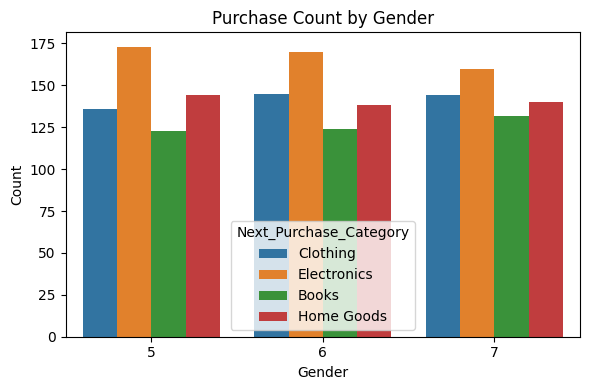

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='Next_Purchase_Category')
plt.title("Purchase Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

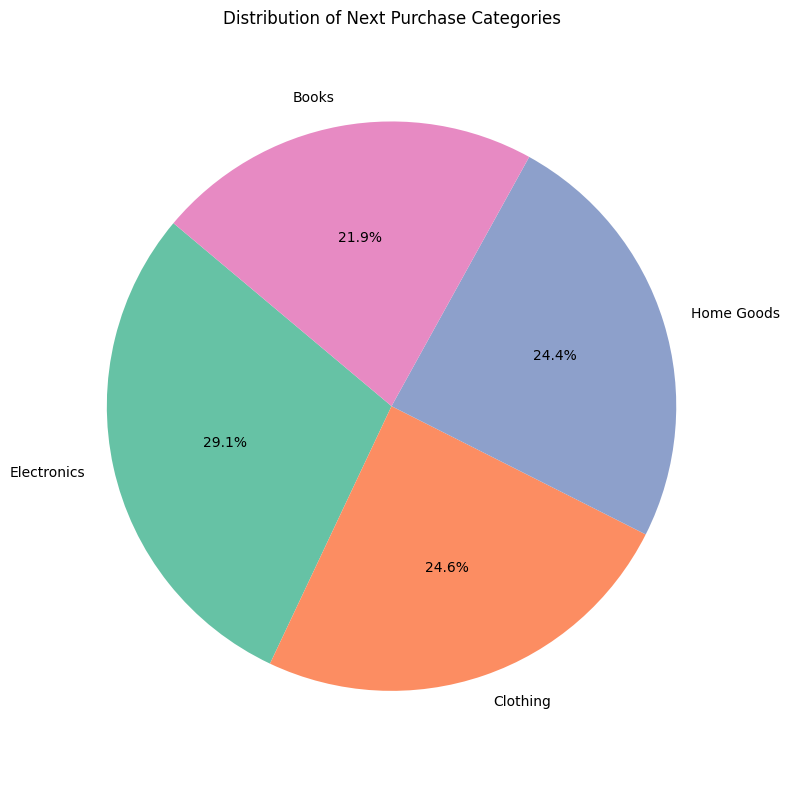

In [14]:
category_counts = data['Next_Purchase_Category'].value_counts()

# Create pie chart
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # Customize as needed
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Next Purchase Categories')
plt.axis('equal')  # Keeps the pie chart circular
plt.tight_layout()
plt.show()

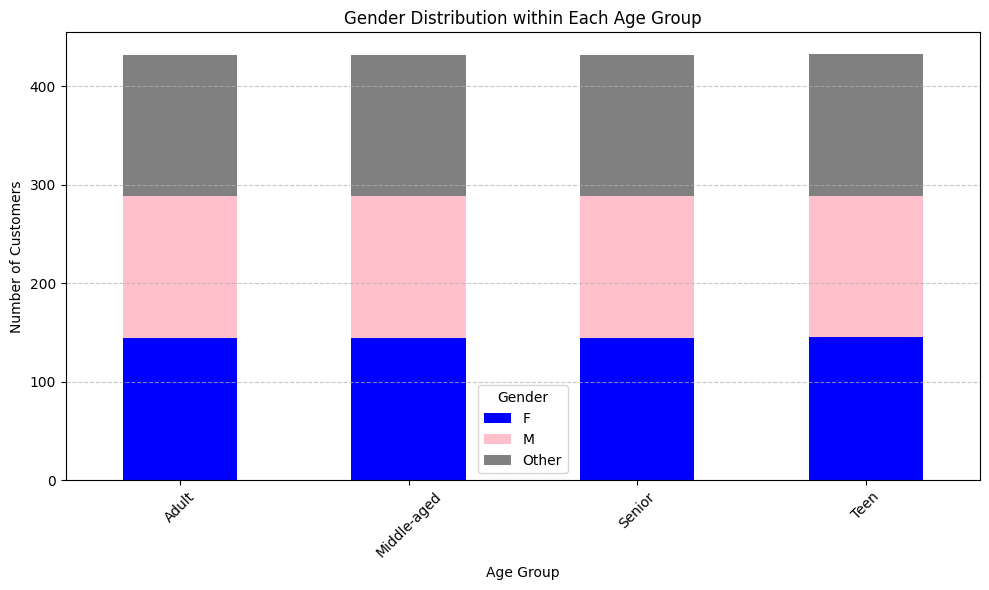

In [16]:
file_path = "customer_purchase_behavior complete.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Create a cross-tab of counts: Gender distribution within each Age Group
gender_age_group = df.groupby(['Age_Group', 'Gender']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
ax = gender_age_group.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['blue', 'pink', 'gray']  # Colors for M, F, Other
)

# Customizing the plot
plt.title('Gender Distribution within Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

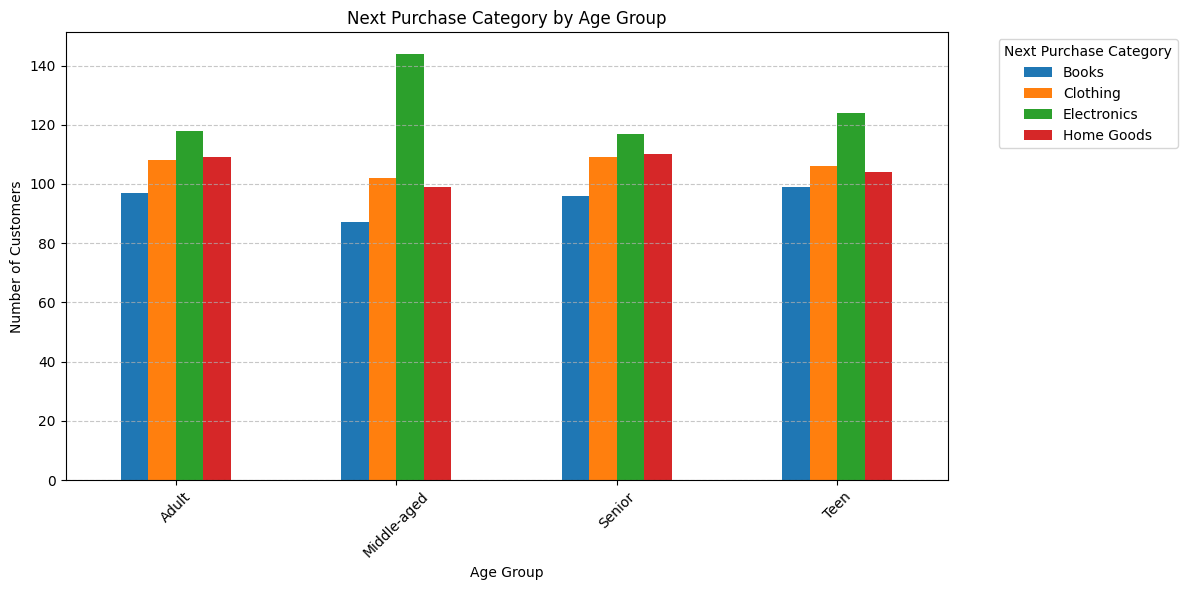

In [17]:
age_purchase_category = df.groupby(['Age_Group', 'Next_Purchase_Category']).size().unstack(fill_value=0)

# Plot grouped bar chart
ax = age_purchase_category.plot(kind='bar', figsize=(12, 6))

# Customizing the plot
plt.title('Next Purchase Category by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Next Purchase Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()